In [4]:
# Import statements
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy
from netCDF4 import Dataset

In [17]:
filename = "cru_ts4.02.2001.2010.pre.dat.nc"
cru_xr = xr.open_dataset(filename)

In [22]:
cru_xr

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 120)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2001-01-16 2001-02-15 ... 2010-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) int32 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.02 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 1811131722. Data generated from:pre.1804231108.dtb
    history:      Tue 13 Nov 2018 20:31:27 GMT : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

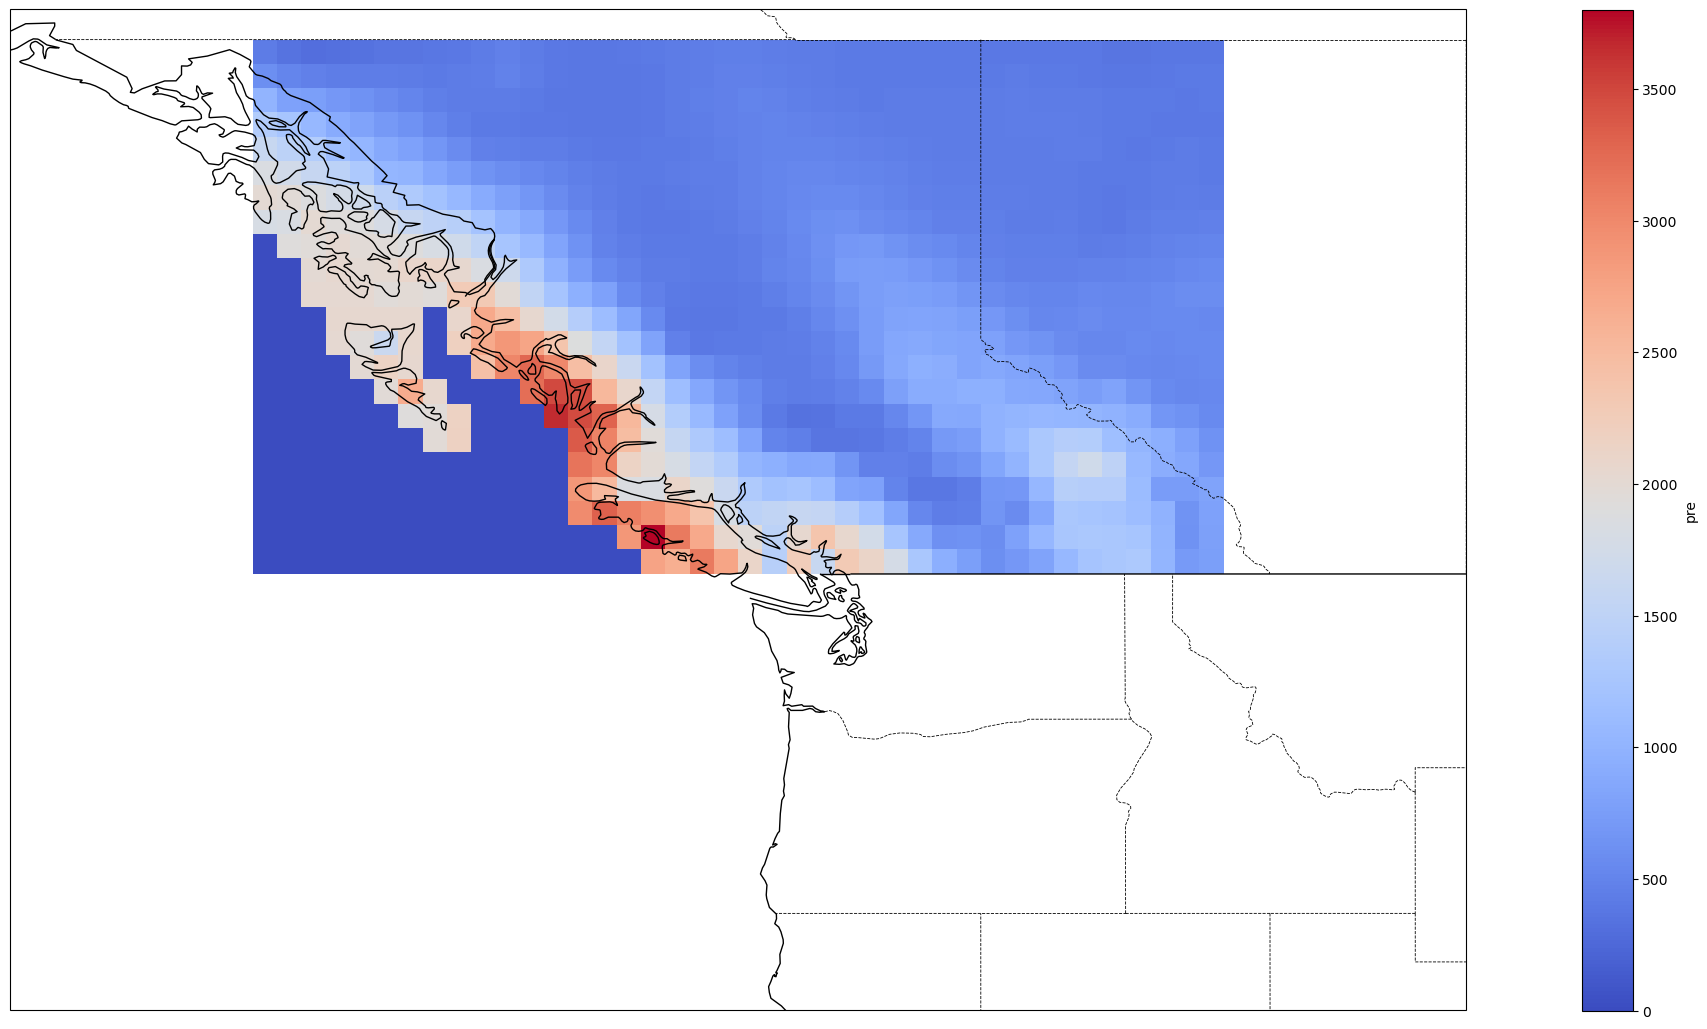

In [53]:
cru_2010 = cru_xr.pre.sel(time='2010', lon = slice(-134.75, -115.25), lat = slice(49.25, 59.75))
cru_plot = cru_2010.sum('time')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



cru_plot.plot(ax=ax,cmap='coolwarm')